First, we want to import our necessary libraries

In [1]:
import os
import cv2
import numpy as np
import yt_dlp

import matplotlib.pyplot as plt

Now we will define a function to download a youtube video

In [2]:
def download_youtube_video(url, output_path):
    ydl_opts = {
    'format': 'bestvideo[ext=mp4]/mp4',
    'outtmpl': output_path,
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

    return output_path

In [4]:
def video_to_3d_data_frame(video_path):
    video_data = []
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        video_data.append(rgb_frame)

    cap.release()
    video_data_array = np.array(video_data)
    return video_data_array

In [5]:
# Usage example
youtube_url = 'https://www.youtube.com/watch?v=YMG_w3XwnrQ'
video_path = 'downloaded_video.mp4'
downloaded_video_path = download_youtube_video(youtube_url, video_path)
video_data_array = video_to_3d_data_frame(downloaded_video_path)

# remove the downloaded file after processing
os.remove(downloaded_video_path)

# video_data_array contains the video's frames as 3D RGB pixel data


[youtube] Extracting URL: https://www.youtube.com/watch?v=YMG_w3XwnrQ
[youtube] YMG_w3XwnrQ: Downloading webpage
[youtube] YMG_w3XwnrQ: Downloading ios player API JSON
[youtube] YMG_w3XwnrQ: Downloading android player API JSON


[youtube] YMG_w3XwnrQ: Downloading m3u8 information
[info] YMG_w3XwnrQ: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 4
[download] Destination: downloaded_video.mp4
[download] 100% of    1.06MiB in 00:00:00 at 2.59MiB/s                 


Now I wanted to make sure that this script actually works as I was expecting, so I visualized each frame

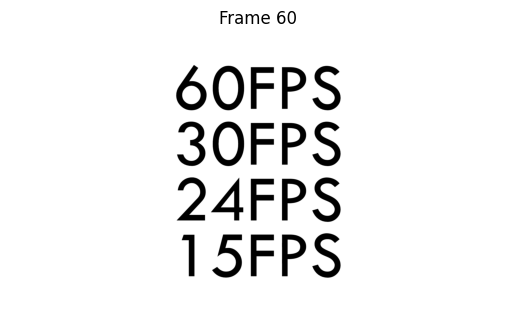

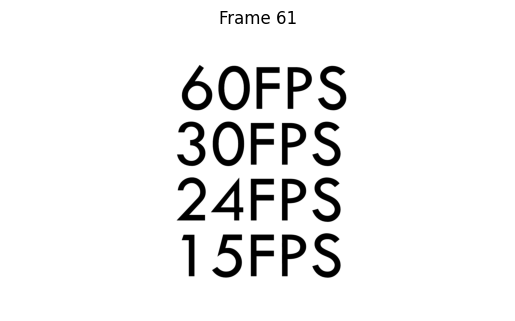

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


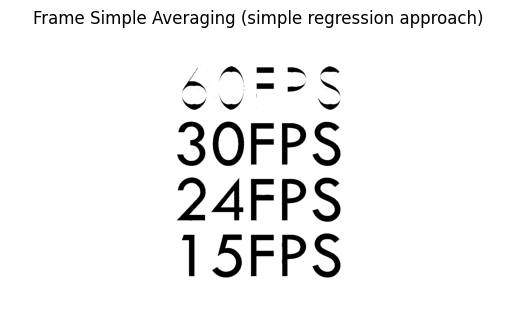

In [6]:
frame_number = 60
frame_motion = 1

if frame_number < len(video_data_array):
    frame1 = video_data_array[frame_number]
    plt.imshow(frame1)
    plt.title(f"Frame {frame_number}")
    plt.axis('off')  # Turn off the axis
    plt.show()
    frame2 = video_data_array[frame_number + frame_motion]
    plt.imshow(frame2)
    plt.title(f"Frame {frame_number + frame_motion}")
    plt.axis('off')  # Turn off the axis
    plt.show()

    frame3 = (frame1 + frame2) / 2
    plt.imshow(frame3)
    plt.title("Frame Simple Averaging (simple regression approach)")
    plt.axis('off')  # Turn off the axis
    plt.show()
else:
    print(f"Frame {frame_number} is out of bounds. The video has {len(video_data_array)} frames.")

So we probably want to avoid a video like the one above for training. Might be an interesting experiment for testing.

In [8]:
print(video_data_array.shape)
print(frame1.shape)

(1190, 1080, 1920, 3)
(1080, 1920, 3)
